<a href="https://colab.research.google.com/github/BrianCKChiu/Research-ML-Project/blob/main/Red_Wine_Quality_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [5]:
from pycaret.utils import enable_colab
import pandas as pd
from pycaret.classification import *

enable_colab()
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
dataset

Colab mode enabled.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Pre-Processing 

In [6]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# convert quality to categorical
dataset['quality'] = pd.Categorical(dataset.quality)
dataset.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [8]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [9]:
red_wine_research = setup(data = data, target = 'quality', session_id=123)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1439, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6852,0.6716,0.3763,0.6557,0.6654,0.4908,0.4950,0.563
et,Extra Trees Classifier,0.6545,0.6757,0.3552,0.6269,0.6347,0.4394,0.4438,0.541
lightgbm,Light Gradient Boosting Machine,0.6445,0.6566,0.3572,0.6221,0.6296,0.4304,0.4332,0.452
gbc,Gradient Boosting Classifier,0.6425,0.6404,0.3661,0.6236,0.6285,0.4295,0.4328,1.460
lr,Logistic Regression,0.5958,0.6029,0.2751,0.5572,0.5663,0.3314,0.3369,0.926
lda,Linear Discriminant Analysis,0.5948,0.6090,0.3285,0.5740,0.5810,0.3536,0.3556,0.033
ridge,Ridge Classifier,0.5859,0.0000,0.2480,0.5008,0.5307,0.2974,0.3083,0.014
dt,Decision Tree Classifier,0.5749,0.5469,0.3395,0.5758,0.5726,0.3412,0.3429,0.022
qda,Quadratic Discriminant Analysis,0.5393,0.5728,0.3516,0.5460,0.5373,0.2958,0.2986,0.020
ada,Ada Boost Classifier,0.5322,0.4855,0.2675,0.4505,0.4759,0.2189,0.2323,0.127


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# Models

## Random Forest

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6931,0.8497,0.3328,0.6580,0.6738,0.5102,0.5125
1,0.6931,0.8575,0.3427,0.6601,0.6751,0.5074,0.5097
2,0.6733,0.8040,0.4876,0.6498,0.6547,0.4678,0.4724
3,0.6634,0.7969,0.3577,0.6306,0.6465,0.4633,0.4646
4,0.6733,0.8243,0.3403,0.6441,0.6490,0.4694,0.4804
5,0.6634,0.8365,0.3076,0.6332,0.6336,0.4414,0.4488
6,0.7624,0.8943,0.3782,0.7219,0.7409,0.6195,0.6218
7,0.6000,0.0000,0.3362,0.5633,0.5795,0.3458,0.3478
8,0.7400,0.0000,0.5298,0.7412,0.7306,0.5813,0.5872


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Ridge

In [12]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6139,0.0,0.2482,0.5084,0.5559,0.3463,0.3581
1,0.6238,0.0,0.2610,0.6374,0.5746,0.3634,0.3754
2,0.5050,0.0,0.2029,0.4079,0.4494,0.1561,0.1637
3,0.5743,0.0,0.2324,0.4784,0.5218,0.2808,0.2897
4,0.5347,0.0,0.2148,0.4324,0.4747,0.2059,0.2171
5,0.5842,0.0,0.2354,0.4807,0.5260,0.2951,0.3063
6,0.6832,0.0,0.2866,0.6224,0.6300,0.4672,0.4800
7,0.6000,0.0,0.2889,0.4977,0.5441,0.3161,0.3270
8,0.5800,0.0,0.2821,0.4758,0.5228,0.2879,0.2990


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


## Logistic Regression

In [13]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6238,0.7563,0.2786,0.5777,0.5966,0.3839,0.3874
1,0.6535,0.7792,0.2997,0.6395,0.6298,0.4285,0.4347
2,0.5446,0.6874,0.2375,0.5137,0.5144,0.2407,0.2455
3,0.5842,0.7338,0.2666,0.5715,0.5583,0.3092,0.3172
4,0.5842,0.7308,0.2849,0.5477,0.5596,0.3183,0.3232
5,0.5743,0.7390,0.2421,0.5125,0.5378,0.2943,0.2990
6,0.6634,0.8300,0.2885,0.6006,0.6256,0.4447,0.4508
7,0.5900,0.0000,0.2959,0.5335,0.5539,0.3131,0.3187
8,0.5800,0.0000,0.3032,0.5401,0.5501,0.3050,0.3105


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


#Tuned Models


## Random Forest


In [27]:
params = {'n_estimators': [700]}
tuned_rf = tune_model(rf, custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6535,0.8592,0.3176,0.6211,0.6366,0.4459,0.4471
1,0.6931,0.8633,0.3331,0.6545,0.6728,0.5065,0.5081
2,0.6436,0.8067,0.4751,0.6166,0.6241,0.4214,0.4265
3,0.6436,0.8087,0.3593,0.6128,0.6264,0.4422,0.4434
4,0.6634,0.8380,0.3365,0.6333,0.6379,0.4474,0.4580
5,0.6733,0.8394,0.3015,0.6374,0.6358,0.4546,0.4648
6,0.7426,0.8936,0.3601,0.7032,0.7213,0.5896,0.5922
7,0.6100,0.0000,0.3411,0.5756,0.5915,0.3654,0.3672
8,0.7300,0.0000,0.5142,0.7187,0.7153,0.5624,0.5686


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 12
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## Ridge

In [15]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6040,0.0,0.2440,0.4997,0.5464,0.3292,0.3409
1,0.6436,0.0,0.2604,0.5291,0.5808,0.3945,0.4094
2,0.4950,0.0,0.1993,0.4029,0.4437,0.1405,0.1463
3,0.5644,0.0,0.2282,0.4692,0.5124,0.2638,0.2720
4,0.5446,0.0,0.2190,0.4415,0.4849,0.2232,0.2345
5,0.5743,0.0,0.2318,0.4747,0.5195,0.2794,0.2886
6,0.6733,0.0,0.2727,0.5573,0.6095,0.4478,0.4623
7,0.5800,0.0,0.2792,0.4811,0.5259,0.2819,0.2916
8,0.5800,0.0,0.2821,0.4749,0.5222,0.2877,0.2988


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


## Logistic Regression

In [16]:
params = {'solver': ["saga"],'penalty': ['elasticnet'], 'l1_ratio':[0.05, 0.2, 0.1]}
tuned_lr = tune_model(lr, custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6436,0.7342,0.2780,0.6134,0.6038,0.4026,0.4123
1,0.6139,0.7289,0.2482,0.5048,0.5540,0.3440,0.3570
2,0.5050,0.6501,0.2047,0.4206,0.4577,0.1611,0.1679
3,0.5347,0.6844,0.2172,0.4586,0.4876,0.2138,0.2267
4,0.5446,0.7052,0.2199,0.4468,0.4908,0.2259,0.2342
5,0.5446,0.6553,0.2207,0.4534,0.4935,0.2282,0.2376
6,0.6535,0.7855,0.2649,0.5390,0.5905,0.4119,0.4270
7,0.5400,0.0000,0.2600,0.4509,0.4911,0.2139,0.2215
8,0.5500,0.0000,0.2679,0.4626,0.5014,0.2418,0.2508


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.05, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# Plotting The Best Model

## Confusion Matrix

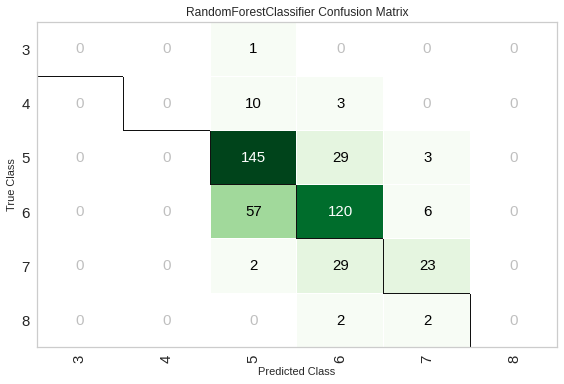

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(tuned_rf, plot = 'confusion_matrix')

## Classification Report

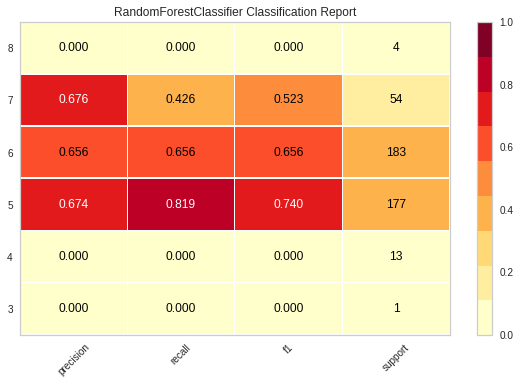

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_rf, plot = 'class_report')

## Decision Boundary Plot

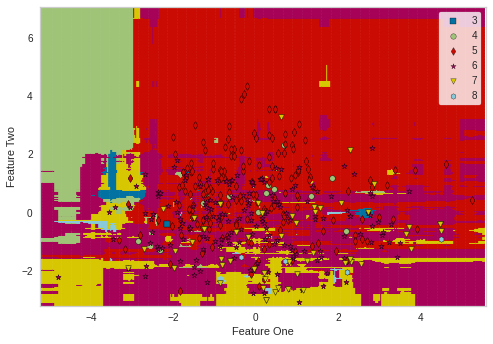

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_rf, plot='boundary')

## Prediction Error Plot

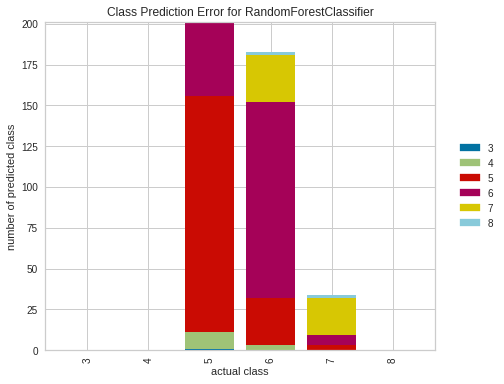

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_rf, plot = 'error')

# Predict on Test

In [21]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6667,0.8205,0.3168,0.6387,0.6462,0.4507,0.4555


# Finalize Model

In [ ]:
final_rf = finalize_model(tuned_rf)

In [23]:
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


# Predict on unseen data

In [24]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0062,0.8946,0.0179,0.0034,0.0044,-0.0002,-0.0003


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0.886
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,5,0.616
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,5,0.514
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,5,0.808
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,5,0.904
